In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('D:\VS CODE\GitHub\AI Adoption\Enterprise_GenAI_Adoption_Impact.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Company Name                  100000 non-null  object 
 1   Industry                      100000 non-null  object 
 2   Country                       100000 non-null  object 
 3   GenAI Tool                    100000 non-null  object 
 4   Adoption Year                 100000 non-null  int64  
 5   Number of Employees Impacted  100000 non-null  int64  
 6   New Roles Created             100000 non-null  int64  
 7   Training Hours Provided       100000 non-null  int64  
 8   Productivity Change (%)       100000 non-null  float64
 9   Employee Sentiment            100000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB


In [8]:
df.head()

,Company Name,Industry,Country,GenAI Tool,Adoption Year,Number of Employees Impacted,New Roles Created,Training Hours Provided,Productivity Change (%),Employee Sentiment
0,Davis LLC Pvt. Ltd.,Healthcare,USA,Mixtral,2022,5277,8,657,25.2,"Productivity increased, but there's anxiety ab..."
1,"Roberts, Holland and Bradshaw Pvt. Ltd.",Telecom,South Africa,Claude,2023,18762,17,23021,27.5,"We now finish tasks faster, but some older emp..."
2,Roman Inc Pvt. Ltd.,Advertising,India,Gemini,2023,11307,17,4680,11.5,"Productivity increased, but there's anxiety ab..."
3,Nguyen-Strickland Pvt. Ltd.,Technology,UK,Groq,2023,18834,12,1750,7.0,"AI helped me reduce repetitive tasks, but lear..."
4,Jackson PLC Pvt. Ltd.,Hospitality,UK,LLaMA,2024,8364,22,3925,2.5,"Job roles have shifted a lot, which is both go..."


In [9]:
df.isnull().sum()

Company Name                    0
Industry                        0
Country                         0
GenAI Tool                      0
Adoption Year                   0
Number of Employees Impacted    0
New Roles Created               0
Training Hours Provided         0
Productivity Change (%)         0
Employee Sentiment              0
dtype: int64

In [12]:
"Duplicate rows:", df.duplicated().sum()

('Duplicate rows:', 0)

In [15]:
df.nunique()

Company Name                    100000
Industry                            14
Country                             14
GenAI Tool                           6
Adoption Year                        3
Number of Employees Impacted     19760
New Roles Created                   30
Training Hours Provided          24110
Productivity Change (%)            331
Employee Sentiment                 100
dtype: int64

In [16]:
text_cols = df.select_dtypes(include='object').columns
df[text_cols] = df[text_cols].apply(lambda x: x.str.strip())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Company Name                  100000 non-null  object 
 1   Industry                      100000 non-null  object 
 2   Country                       100000 non-null  object 
 3   GenAI Tool                    100000 non-null  object 
 4   Adoption Year                 100000 non-null  int64  
 5   Number of Employees Impacted  100000 non-null  int64  
 6   New Roles Created             100000 non-null  int64  
 7   Training Hours Provided       100000 non-null  int64  
 8   Productivity Change (%)       100000 non-null  float64
 9   Employee Sentiment            100000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB


In [20]:
df.describe(include='all')

,Company Name,Industry,Country,GenAI Tool,Adoption Year,Number of Employees Impacted,New Roles Created,Training Hours Provided,Productivity Change (%),Employee Sentiment
count,100000,100000,100000,100000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000
unique,100000,14,14,6,NaN,NaN,NaN,NaN,NaN,100
top,Davis LLC Pvt. Ltd.,Healthcare,Brazil,Gemini,NaN,NaN,NaN,NaN,NaN,"Mixed responses—management excited, staff feel..."
freq,1,7281,7322,16885,NaN,NaN,NaN,NaN,NaN,1081
mean,NaN,NaN,NaN,NaN,2023.00296,10051.800200,15.502210,12742.467470,18.469596,NaN
std,NaN,NaN,NaN,NaN,0.81643,5756.901496,8.643673,7059.376074,9.528166,NaN
min,NaN,NaN,NaN,NaN,2022.00000,100.000000,1.000000,500.000000,2.000000,NaN
25%,NaN,NaN,NaN,NaN,2022.00000,5060.750000,8.000000,6620.750000,10.200000,NaN
50%,NaN,NaN,NaN,NaN,2023.00000,10044.000000,16.000000,12745.500000,18.400000,NaN
75%,NaN,NaN,NaN,NaN,2024.00000,15056.000000,23.000000,18829.250000,26.700000,NaN


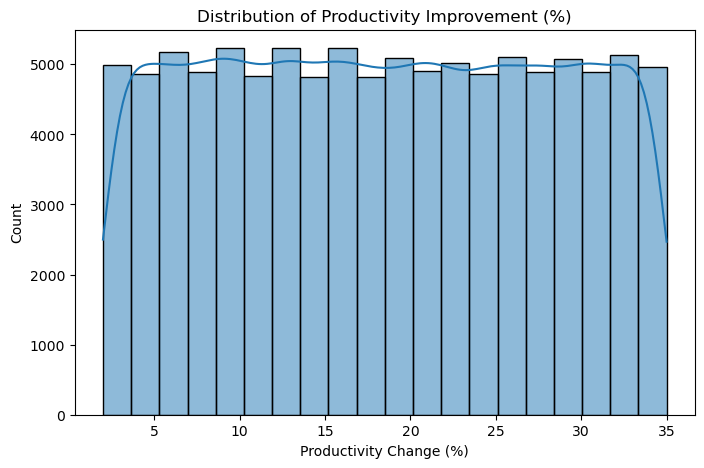

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['Productivity Change (%)'], bins=20, kde=True)
plt.title('Distribution of Productivity Improvement (%)')
plt.show()

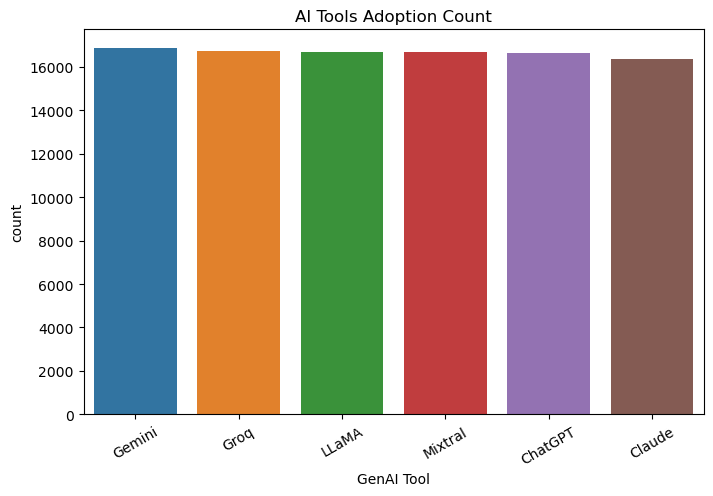

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='GenAI Tool', order=df['GenAI Tool'].value_counts().index)
plt.title('AI Tools Adoption Count')
plt.xticks(rotation=30)
plt.show()

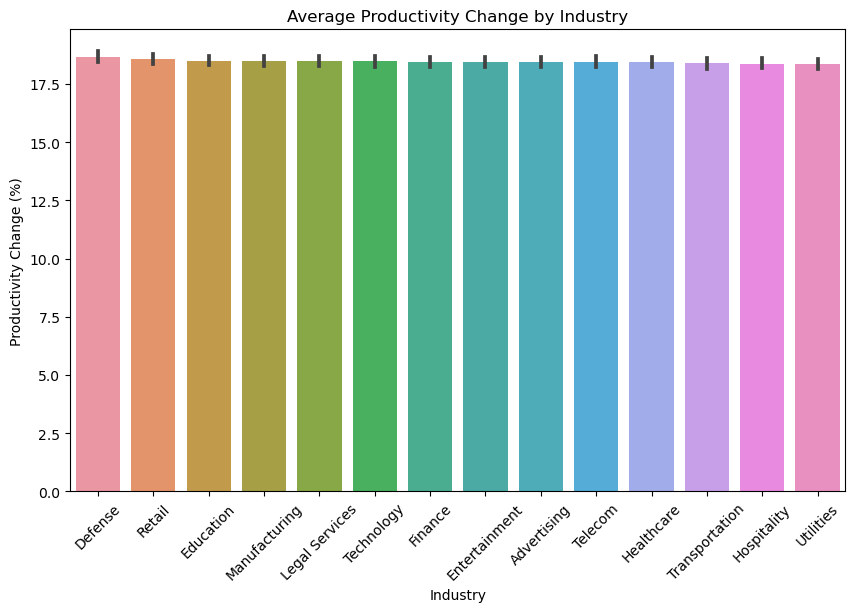

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Industry', y='Productivity Change (%)', estimator='mean', order=df.groupby('Industry')['Productivity Change (%)'].mean().sort_values(ascending=False).index)
plt.title('Average Productivity Change by Industry')
plt.xticks(rotation=45)
plt.show()

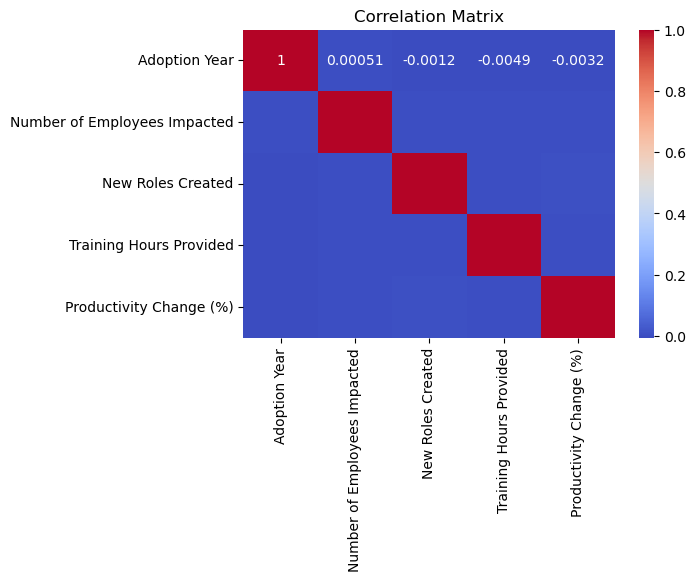

In [25]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
df[['Training Hours Provided', 'Productivity Change (%)']].corr()

,Training Hours Provided,Productivity Change (%)
Training Hours Provided,1.00000,-0.00035
Productivity Change (%),-0.00035,1.00000


In [27]:
avg_productivity = df['Productivity Change (%)'].mean()
top_industry = df.groupby('Industry')['Productivity Change (%)'].mean().idxmax()
most_used_tool = df['GenAI Tool'].mode()[0]

print(f"Average Productivity Improvement: {avg_productivity:.2f}%")
print(f"Top Performing Industry: {top_industry}")
print(f"Most Adopted GenAI Tool: {most_used_tool}")

Average Productivity Improvement: 18.47%
Top Performing Industry: Defense
Most Adopted GenAI Tool: Gemini


In [ ]:
df.to_csv('AI_Adoption_Cleaned.csv', index=False)


In [29]:
df.head()

,Company Name,Industry,Country,GenAI Tool,Adoption Year,Number of Employees Impacted,New Roles Created,Training Hours Provided,Productivity Change (%),Employee Sentiment
0,Davis LLC Pvt. Ltd.,Healthcare,USA,Mixtral,2022,5277,8,657,25.2,"Productivity increased, but there's anxiety ab..."
1,"Roberts, Holland and Bradshaw Pvt. Ltd.",Telecom,South Africa,Claude,2023,18762,17,23021,27.5,"We now finish tasks faster, but some older emp..."
2,Roman Inc Pvt. Ltd.,Advertising,India,Gemini,2023,11307,17,4680,11.5,"Productivity increased, but there's anxiety ab..."
3,Nguyen-Strickland Pvt. Ltd.,Technology,UK,Groq,2023,18834,12,1750,7.0,"AI helped me reduce repetitive tasks, but lear..."
4,Jackson PLC Pvt. Ltd.,Hospitality,UK,LLaMA,2024,8364,22,3925,2.5,"Job roles have shifted a lot, which is both go..."


In [30]:
replace_dict = {
    'GenAI Tool': {'Groq': 'Grok'}  } 

In [31]:
df.head()

,Company Name,Industry,Country,GenAI Tool,Adoption Year,Number of Employees Impacted,New Roles Created,Training Hours Provided,Productivity Change (%),Employee Sentiment
0,Davis LLC Pvt. Ltd.,Healthcare,USA,Mixtral,2022,5277,8,657,25.2,"Productivity increased, but there's anxiety ab..."
1,"Roberts, Holland and Bradshaw Pvt. Ltd.",Telecom,South Africa,Claude,2023,18762,17,23021,27.5,"We now finish tasks faster, but some older emp..."
2,Roman Inc Pvt. Ltd.,Advertising,India,Gemini,2023,11307,17,4680,11.5,"Productivity increased, but there's anxiety ab..."
3,Nguyen-Strickland Pvt. Ltd.,Technology,UK,Groq,2023,18834,12,1750,7.0,"AI helped me reduce repetitive tasks, but lear..."
4,Jackson PLC Pvt. Ltd.,Hospitality,UK,LLaMA,2024,8364,22,3925,2.5,"Job roles have shifted a lot, which is both go..."


In [34]:
df['GenAI Tool'] = df['GenAI Tool'].replace('Groq', 'Grok')

In [35]:
df.head()   

,Company Name,Industry,Country,GenAI Tool,Adoption Year,Number of Employees Impacted,New Roles Created,Training Hours Provided,Productivity Change (%),Employee Sentiment
0,Davis LLC Pvt. Ltd.,Healthcare,USA,Mixtral,2022,5277,8,657,25.2,"Productivity increased, but there's anxiety ab..."
1,"Roberts, Holland and Bradshaw Pvt. Ltd.",Telecom,South Africa,Claude,2023,18762,17,23021,27.5,"We now finish tasks faster, but some older emp..."
2,Roman Inc Pvt. Ltd.,Advertising,India,Gemini,2023,11307,17,4680,11.5,"Productivity increased, but there's anxiety ab..."
3,Nguyen-Strickland Pvt. Ltd.,Technology,UK,Grok,2023,18834,12,1750,7.0,"AI helped me reduce repetitive tasks, but lear..."
4,Jackson PLC Pvt. Ltd.,Hospitality,UK,LLaMA,2024,8364,22,3925,2.5,"Job roles have shifted a lot, which is both go..."


In [36]:
df.to_csv('AI_Adoption_Cleaned.csv', index=False)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Company Name                  100000 non-null  object 
 1   Industry                      100000 non-null  object 
 2   Country                       100000 non-null  object 
 3   GenAI Tool                    100000 non-null  object 
 4   Adoption Year                 100000 non-null  int64  
 5   Number of Employees Impacted  100000 non-null  int64  
 6   New Roles Created             100000 non-null  int64  
 7   Training Hours Provided       100000 non-null  int64  
 8   Productivity Change (%)       100000 non-null  float64
 9   Employee Sentiment            100000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB
